In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
# import numpy as np
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [3]:
dataset_fake = '/content/drive/MyDrive/24-1p/faces_fake/faces_fake'
dataset_real = '/content/drive/MyDrive/24-1p/faces_fake/faces_real'
dataset_path = '/content/drive/MyDrive/24-1p/faces_fake/metadata.csv'

In [4]:
df = pd.read_csv(dataset_path)

In [5]:
df.head()

,videoname,original_width,original_height,label,original
0,rzxslqqecc.jpg,89,90,REAL,rzxslqqecc.jpg
1,ytqhdzqdjd.jpg,186,185,REAL,ytqhdzqdjd.jpg
2,huqwqfreju.jpg,223,223,REAL,huqwqfreju.jpg
3,rixjixvthd.jpg,185,186,REAL,rixjixvthd.jpg
4,pupczrsusw.jpg,75,75,REAL,pupczrsusw.jpg


In [ ]:
df.tail()

,videoname,original_width,original_height,label,original
23995,qukjfhjisw.jpg,75,75,FAKE,qukjfhjisw.jpg
23996,pwdwxpwbyp.jpg,129,129,FAKE,pwdwxpwbyp.jpg
23997,avcnyamvrb.jpg,154,155,FAKE,avcnyamvrb.jpg
23998,epxpeanhzq.jpg,186,186,FAKE,epxpeanhzq.jpg
23999,xkikoxtneh.jpg,155,155,FAKE,xkikoxtneh.jpg


In [5]:
df.shape

(24000, 5)

In [ ]:
df.columns

Index(['videoname', 'original_width', 'original_height', 'label', 'original'], dtype='object')

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

videoname          0
original_width     0
original_height    0
label              0
original           0
dtype: int64

In [6]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['videoname', 'label', 'original'], dtype='object')

Numerical type columns:
Index(['original_width', 'original_height'], dtype='object')


In [7]:
# 데이터의 형태별로 구분/ 범주형, 비범주, 이산, 연속
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [8]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [9]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['label']
Non-Categorical Features: ['videoname', 'original']
Discrete Features: []
Continuous Features: ['original_width', 'original_height']


In [10]:
df = df.fillna("Not Available") # null값 채워주는 용도?

In [11]:
for i in categorical:
    print(i,':', df[i].unique())
    print()

label : ['REAL' 'FAKE']



In [12]:
for i in categorical:
    print(df[i].value_counts())
    print()

label
FAKE    16000
REAL     8000
Name: count, dtype: int64



<ipython-input-13-2779891287e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[i], data = df, palette = 'hls')


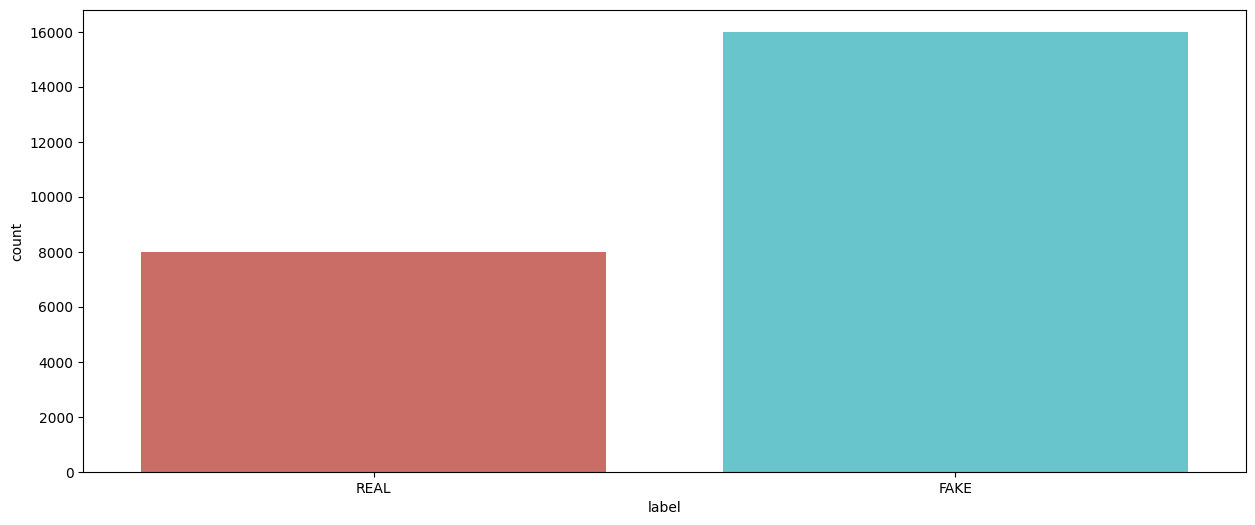

In [13]:

for i in categorical:
    plt.figure(figsize=(15,6))
    sns.countplot(x = df[i], data = df, palette = 'hls')
    plt.show()

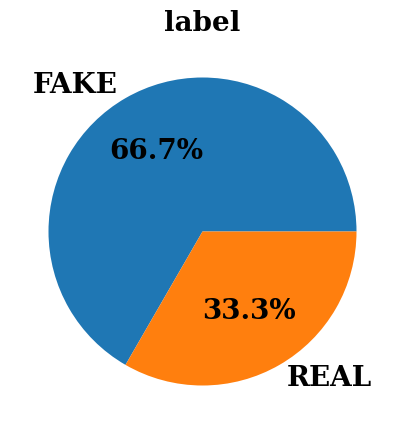

In [16]:
for i in categorical:
    plt.figure(figsize=(10,5))
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index,
            autopct='%1.1f%%', textprops={ 'fontsize': 20,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
    hfont = {'fontname':'serif', 'weight': 'bold'}
    plt.title(i, size=20, **hfont)
    plt.show()

In [14]:
real_df = df[df["label"] == "REAL"]
fake_df = df[df["label"] == "FAKE"]

sample_meta = pd.concat([real_df, fake_df])

Train_set, Test_set = train_test_split(sample_meta,test_size=0.2,random_state=42,stratify=sample_meta['label'])
Train_set, Val_set  = train_test_split(Train_set,test_size=0.3,random_state=42,stratify=Train_set['label'])
# 새로운 샘플링 후의 데이터 프레임을 합치기
sample_meta = pd.concat([real_df, fake_df])

In [15]:
from sklearn.model_selection import train_test_split

Train_set, Test_set = train_test_split(sample_meta,test_size=0.2,random_state=42,stratify=sample_meta['label'])
Train_set, Val_set  = train_test_split(Train_set,test_size=0.3,random_state=42,stratify=Train_set['label'])

In [16]:
Train_set.shape,Val_set.shape,Test_set.shape

((13440, 5), (5760, 5), (4800, 5))

In [17]:
import cv2


In [18]:
import os
import cv2


# 두 디렉토리의 이미지 파일 목록 읽기
real_image_files = os.listdir(dataset_real)
fake_image_files = os.listdir(dataset_fake)

# 파일 목록 정렬
real_image_files.sort()
fake_image_files.sort()

# 두 목록을 결합
image_files = real_image_files + fake_image_files

# 선택할 이미지 수 설정 (예: 10개)
selected_images = image_files[:10]

# 이미지 정보 출력
for i, image_file in enumerate(selected_images):
    # 이미지 경로 결정
    if image_file in real_image_files:
        image = cv2.imread(os.path.join(dataset_real, image_file))
    else:
        image = cv2.imread(os.path.join(dataset_fake, image_file))

    if image is not None:
        height, width, _ = image.shape
        print(f"Resolution of image {i+1}: {width} x {height}")
    else:
        print(f"Error reading image {i+1}")

# 디렉토리에 이미지 파일이 10개 미만인 경우 경고 메시지 출력
if len(image_files) < 10:
    print(f"Only {len(image_files)} images found in the directories.")


Resolution of image 1: 224 x 224
Resolution of image 2: 224 x 224
Resolution of image 3: 224 x 224
Resolution of image 4: 224 x 224
Resolution of image 5: 224 x 224
Resolution of image 6: 224 x 224
Resolution of image 7: 224 x 224
Resolution of image 8: 224 x 224
Resolution of image 9: 224 x 224
Resolution of image 10: 224 x 224


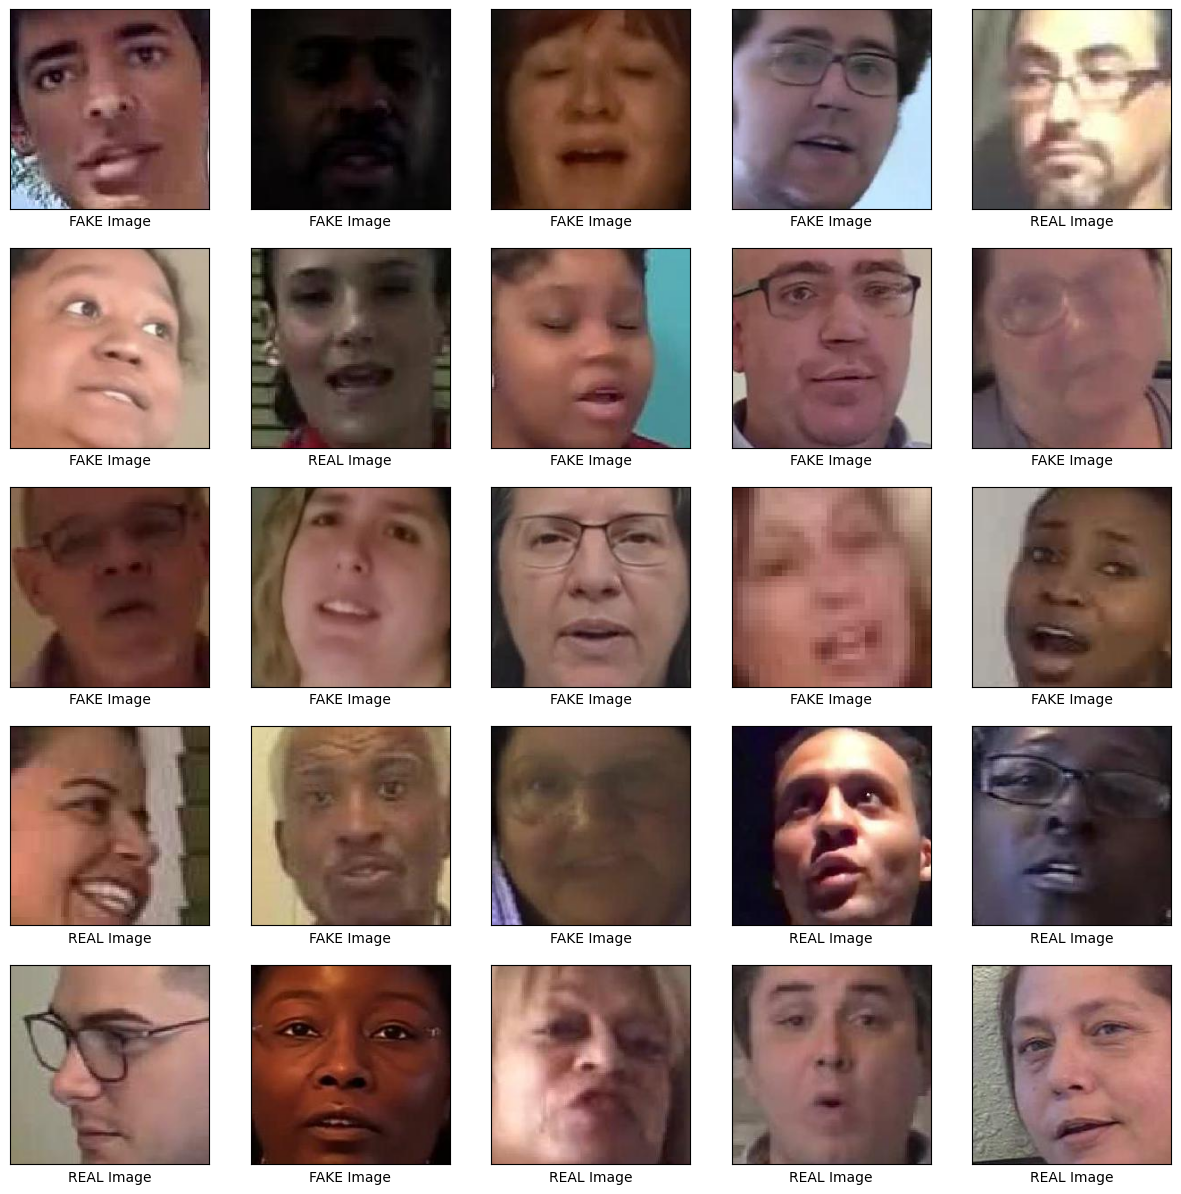

In [19]:
import matplotlib.pyplot as plt
import cv2
import os

# Train_set의 이미지를 시각화
plt.figure(figsize=(15, 15))

for cur, i in enumerate(Train_set.index[25:50]):
    plt.subplot(5, 5, cur + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # 이미지 파일 이름
    image_name = Train_set.loc[i, 'videoname'][:-4] + '.jpg'

    # 레이블에 따라 디렉토리 결정
    if Train_set.loc[i, 'label'] == 'FAKE':
        image_path = os.path.join('/content/drive/MyDrive/24-1p/faces_fake/faces_fake', image_name)
        plt.xlabel('FAKE Image')
    else:
        image_path = os.path.join('/content/drive/MyDrive/24-1p/faces_fake/faces_real', image_name)
        plt.xlabel('REAL Image')

    # 이미지 읽기 및 표시
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.show()


In [20]:
import os
import cv2
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import time

def read_and_process_image(image_path, label):
    image = cv2.imread(image_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image / 255.0
        return image, label
    else:
        print(f"Error reading image: {image_path}")
        return None, None

In [21]:
def retreive_dataset(set_name, dataset_real, dataset_fake):
    images, labels = [], []
    futures = []

    with ThreadPoolExecutor(max_workers=8) as executor:  # Adjust the number of workers based on your CPU cores
        for img, imclass in zip(set_name['videoname'], set_name['label']):
            image_name = img[:-4] + '.jpg'
            if imclass == 'FAKE':
                image_path = os.path.join(dataset_fake, image_name)
                label = 1
            else:
                image_path = os.path.join(dataset_real, image_name)
                label = 0

            futures.append(executor.submit(read_and_process_image, image_path, label))

        for future in futures:
            image, label = future.result()
            if image is not None:
                images.append(image)
                labels.append(label)

    return np.array(images), np.array(labels)
# 시간 측정 시작
start_time = time.time()
# 데이터셋 생성
X_train, y_train = retreive_dataset(Train_set, dataset_real, dataset_fake)
X_val, y_val = retreive_dataset(Val_set, dataset_real, dataset_fake)
X_test, y_test = retreive_dataset(Test_set, dataset_real, dataset_fake)
# 시간 측정 종료
end_time = time.time()
elapsed_time = end_time - start_time
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'Time taken: {elapsed_time} seconds')

X_train shape: (13440, 224, 224, 3)
y_train shape: (13440,)
X_val shape: (5760, 224, 224, 3)
y_val shape: (5760,)
X_test shape: (4800, 224, 224, 3)
y_test shape: (4800,)
Time taken: 792.8817546367645 seconds


In [22]:
from functools import partial


In [23]:
tf.random.set_seed(42)

In [24]:
DefaultConv2D = partial(layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

# Model Definition
model = models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(units=128, activation="relu",
                 kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=64, activation="relu",
                 kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation="sigmoid")
])

In [25]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss="binary_crossentropy", metrics=["accuracy"])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      9472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 112, 112, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,  # Adjust as needed
    batch_size=32,  # Adjust as needed
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/10
420/420 [==============================] - 758s 2s/step - loss: 0.7557 - accuracy: 0.5938 - val_loss: 0.6406 - val_accuracy: 0.6413
Epoch 2/10
420/420 [==============================] - 741s 2s/step - loss: 0.6509 - accuracy: 0.6530 - val_loss: 0.6109 - val_accuracy: 0.6736
Epoch 3/10
420/420 [==============================] - 743s 2s/step - loss: 0.6142 - accuracy: 0.6778 - val_loss: 15.1180 - val_accuracy: 0.3387
Epoch 4/10
420/420 [==============================] - 742s 2s/step - loss: 0.5995 - accuracy: 0.6894 - val_loss: 0.5892 - val_accuracy: 0.6927
Epoch 5/10
420/420 [==============================] - 746s 2s/step - loss: 0.5778 - accuracy: 0.7051 - val_loss: 0.6229 - val_accuracy: 0.6530
Epoch 6/10
420/420 [==============================] - 740s 2s/step - loss: 0.5570 - accuracy: 0.7188 - val_loss: 0.5745 - val_accuracy: 0.6950
Epoch 7/10
420/420 [==============================] - 737s 2s/step - loss: 0.5286 - accuracy: 0.7393 - val_loss: 0.5971 - val_accuracy: 0.684

In [25]:
y_pred = model.predict(X_test)

150/150 [==============================] - 2s 12ms/step


In [26]:
y_test_pred_binary = (y_pred > 0.5).astype(int)

In [27]:
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

420/420 [==============================] - 5s 12ms/step


In [28]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

train_accuracy = accuracy_score(y_train, y_train_pred_binary)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 73.21%


In [29]:
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 70.96%


In [30]:
f1 = f1_score(y_test, y_test_pred_binary)
print(f"F1 Score: {f1:.4f}")

precision = precision_score(y_test, y_test_pred_binary)
print(f"Precison: {precision:.4f}")

recall = recall_score(y_test, y_test_pred_binary)
print(f"Recall: {recall:.4f}")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_test_pred_binary)
print(f"AUC-ROC: {auc_roc:.4f}")

F1 Score: 0.8004
Precison: 0.7386
Recall: 0.8734
AUC-ROC: 0.6277


In [31]:
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 611  989]
 [ 405 2795]]


In [34]:
from tensorflow.keras.applications import ResNet50

In [32]:
input_shape = (224, 224, 3)

In [35]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

In [36]:
for layer in base_model.layers:
    layer.trainable = False

In [37]:
model_resnet50 = models.Sequential()
model_resnet50.add(base_model)
model_resnet50.add(layers.GlobalAveragePooling2D())
model_resnet50.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model_resnet50.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_3 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23589761 (89.99 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [39]:
from tensorflow.keras import optimizers

In [40]:
model_resnet50.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
history = model_resnet50.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/5
420/420 [==============================] - 26s 52ms/step - loss: 0.6525 - accuracy: 0.6579 - val_loss: 0.6330 - val_accuracy: 0.6667
Epoch 2/5
420/420 [==============================] - 13s 31ms/step - loss: 0.6338 - accuracy: 0.6671 - val_loss: 0.6284 - val_accuracy: 0.6672
Epoch 3/5
420/420 [==============================] - 13s 31ms/step - loss: 0.6293 - accuracy: 0.6685 - val_loss: 0.6250 - val_accuracy: 0.6698
Epoch 4/5
420/420 [==============================] - 13s 32ms/step - loss: 0.6248 - accuracy: 0.6699 - val_loss: 0.6224 - val_accuracy: 0.6696
Epoch 5/5
420/420 [==============================] - 13s 31ms/step - loss: 0.6246 - accuracy: 0.6719 - val_loss: 0.6217 - val_accuracy: 0.6701


In [42]:
y_pred = model_resnet50.predict(X_test)

150/150 [==============================] - 4s 21ms/step


In [43]:
y_test_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
y_train_pred = model_resnet50.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 58.17%


In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 58.25%
